In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahabziari","key":"c22fcf727f5de65b6368e153ddbbef6d"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 59.4MB/s]


In [ ]:
!unzip "/content/mobile-price-classification.zip" -d "/content/"

Archive:  /content/mobile-price-classification.zip
  inflating: /content/test.csv       
  inflating: /content/train.csv      


# **DATA**

In [ ]:
import pandas as pd
train = pd.read_csv("/content/train.csv")
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
y = train["price_range"].values
train_x = train.drop("price_range", axis=1, inplace=False)
train_x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_x = sc.fit_transform(train_x)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X , train_y , test_y = train_test_split(train_x , y , test_size = 0.2, random_state = 42)
print(train_X.shape)
print(test_X.shape)

(1600, 20)
(400, 20)


# **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm1 = SVC()
svm1.fit(train_X , train_y)
acc = svm1.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 89.25%


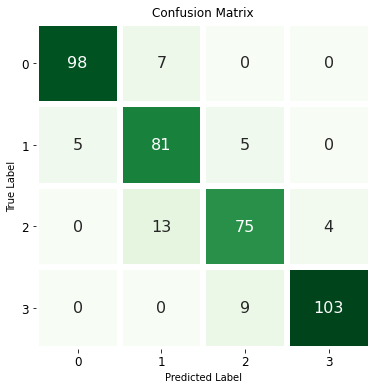

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = svm1.predict(test_X)
CM = confusion_matrix(test_y, pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= CM )
f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

## **Kernel**

In [ ]:
svm_kernel = SVC(kernel="linear")
svm_kernel.fit(train_X , train_y)
acc = svm_kernel.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 97.0%


In [ ]:
svm_kernel = SVC(kernel="poly" )
svm_kernel.fit(train_X , train_y)
acc = svm_kernel.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 78.75%


In [ ]:
svm_kernel = SVC(kernel="poly" , degree = 4)
svm_kernel.fit(train_X , train_y)
acc = svm_kernel.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 39.75%


In [ ]:
svm_kernel = SVC(kernel="poly" , degree = 1)
svm_kernel.fit(train_X , train_y)
acc = svm_kernel.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 96.25%


In [ ]:
svm_kernel = SVC(kernel="sigmoid")
svm_kernel.fit(train_X , train_y)
acc = svm_kernel.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 92.25%


In [ ]:
svm_kernel = SVC(kernel="sigmoid" , coef0=0.15)
svm_kernel.fit(train_X , train_y)
acc = svm_kernel.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 93.25%


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT = DT.fit(train_X, train_y)
acc = DT.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 84.25%


## **Q9 - Parametrs**

In [ ]:
DT = DecisionTreeClassifier(random_state=0 , max_depth=5)
DT = DT.fit(train_X, train_y)
acc = DT.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 79.75%


In [ ]:
DT = DecisionTreeClassifier(random_state=0 , max_depth=14)
DT = DT.fit(train_X, train_y)
acc = DT.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 83.25%


In [ ]:
DT = DecisionTreeClassifier(random_state=0 , max_depth=15)
DT = DT.fit(train_X, train_y)
acc = DT.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 84.25%


In [ ]:
DT = DecisionTreeClassifier(random_state=0 , min_samples_leaf=7)
DT = DT.fit(train_X, train_y)
acc = DT.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 85.75%


In [ ]:
DT = DecisionTreeClassifier(random_state=0 , min_samples_split=4)
DT = DT.fit(train_X, train_y)
acc = DT.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 82.5%


In [ ]:
DT = DecisionTreeClassifier(random_state=0 , max_leaf_nodes=4)
DT = DT.fit(train_X, train_y)
acc = DT.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")


Accuracy on test is : 75.0%


## **Random Forrest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF = RF.fit(train_X, train_y)
acc = RF.score(test_X, test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 88.5%


# **DATA MINING**

## **Binning - a**

### **model 1 (5bin , equal)**

In [ ]:
min = min(train['battery_power'])

In [ ]:
max = max(train['battery_power'])

In [ ]:
size_i = (max - min) / 5

In [ ]:
bins = [min-1 , min + size_i , min + 2*size_i , min + 3*size_i , min +4*size_i , max+1]

In [ ]:
bins

[500, 800.4, 1099.8, 1399.1999999999998, 1698.6, 1999]

In [ ]:
med_bin = [(bins[0]+bins[1]) / 2 , (bins[1]+ bins[2]) / 2 , (bins[2]+bins[3]) / 2 , (bins[3]+bins[4]) / 2 , (bins[4]+bins[5])/2 ]

In [ ]:
train_bin = train
train_bin.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train_bin['battery_med'] = pd.cut(train_bin['battery_power'] , bins ,labels = med_bin)
train_bin.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_med
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,950.1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,950.1
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,650.2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,650.2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1848.8


In [ ]:
train_bin = train_bin.drop(['price_range','battery_power'], axis=1, inplace=False)

In [ ]:
sc = StandardScaler()
train_bin = sc.fit_transform(train_bin)

In [ ]:
train_binx, test_binx , train_biny , test_biny = train_test_split(train_bin , y , test_size = 0.2, random_state = 42)
print(train_binx.shape)
print(test_binx.shape)

(1600, 20)
(400, 20)


In [ ]:
model_svm = SVC()
model_svm.fit(train_binx , train_biny)
acc = model_svm.score(test_binx, test_biny)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 88.5%


### **model 2 (4bin , equal)**

In [ ]:
size_i = (max - min) / 4

In [ ]:
bins = [min-1 , min + size_i , min + 2*size_i , min + 3*size_i , max+1]
med_bin = [(bins[0]+bins[1]) / 2 , (bins[1]+ bins[2]) / 2 , (bins[2]+bins[3]) / 2 , (bins[3]+bins[4]) / 2 ]

In [ ]:
train_bin = train
train_bin['battery_med'] = pd.cut(train_bin['battery_power'] , bins ,labels = med_bin)
train_bin.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_med
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,687.625
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1062.375
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,687.625
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,687.625
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1811.375


In [ ]:
train_bin = train_bin.drop(['price_range','battery_power'], axis=1, inplace=False)

In [ ]:
sc = StandardScaler()
train_bin = sc.fit_transform(train_bin)

In [ ]:
train_binx, test_binx , train_biny , test_biny = train_test_split(train_bin , y , test_size = 0.2, random_state = 42)
print(train_binx.shape)
print(test_binx.shape)

(1600, 20)
(400, 20)


In [ ]:
model_svm = SVC()
model_svm.fit(train_binx , train_biny)
acc = model_svm.score(test_binx, test_biny)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 86.25%


### **model 3 (6bin , not_equal)**

In [ ]:
size_i = (max - min) / 6
bins = [min-1 , min + size_i-100 , min + 2*size_i-50 , min + 3*size_i , min + 4*size_i+50 , min + 5*size_i+100 , max+1]
med_bin = [(bins[0]+bins[1]) / 2 , (bins[1]+ bins[2]) / 2 , (bins[2]+bins[3]) / 2 , (bins[3]+bins[4]) / 2 , (bins[4]+bins[5]) / 2 , (bins[5]+bins[6]) / 2]

In [ ]:
train_bin = train
train_bin['battery_med'] = pd.cut(train_bin['battery_power'] , bins ,labels = med_bin)
train_bin.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,battery_med
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,800.25
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1099.75
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,575.25
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,575.25
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1698.75


In [ ]:
train_bin.value_counts(['battery_med'])

battery_med
800.25         409
1698.75        395
1099.75        389
1399.25        381
575.25         223
1923.75        203
dtype: int64

In [ ]:
train_bin = train_bin.drop(['price_range','battery_power'], axis=1, inplace=False)
sc = StandardScaler()
train_bin = sc.fit_transform(train_bin)

In [ ]:
train_binx, test_binx , train_biny , test_biny = train_test_split(train_bin , y , test_size = 0.2, random_state = 42)
print(train_binx.shape)
print(test_binx.shape)

(1600, 20)
(400, 20)


In [ ]:
model_svm = SVC()
model_svm.fit(train_binx , train_biny)
acc = model_svm.score(test_binx, test_biny)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 89.75%


## **One Hot Coding - b**

- We dont have any categorical data

## **Log Transform - c**

In [ ]:
train_l = train.drop("price_range", axis=1, inplace=False)
train_l.min()

battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
dtype: float64

In [ ]:
import numpy as np
train_l = (train_l - train_l.min() + 1).transform(np.log)
train_l

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,5.834811,0.000000,0.993252,0.000000,0.693147,0.000000,1.791759,0.405465,4.691348,0.693147,1.098612,3.044522,5.549076,7.738052,1.609438,2.079442,2.890372,0.000000,0.000000,0.693147
1,6.255750,0.693147,0.000000,0.693147,0.000000,0.693147,3.951244,0.470004,4.043051,1.098612,1.945910,6.809039,7.305860,7.773174,2.564949,1.386294,1.791759,0.693147,0.693147,0.000000
2,4.143135,0.693147,0.000000,0.693147,1.098612,0.693147,3.688879,0.587787,4.189655,1.609438,1.945910,7.142037,7.104144,7.761319,1.945910,1.098612,2.079442,0.693147,0.693147,0.000000
3,4.744932,0.693147,1.098612,0.000000,0.000000,0.000000,2.197225,0.530628,3.951244,1.791759,2.302585,7.104144,7.160069,7.829630,2.484907,2.197225,2.302585,0.693147,0.000000,0.000000
4,7.186144,0.693147,0.530628,0.000000,2.639057,0.693147,3.761200,0.405465,4.127134,0.693147,2.708050,7.097549,6.569481,7.052721,1.386294,1.098612,2.639057,0.693147,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.683580,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.530628,3.295837,1.791759,2.708050,7.109062,7.237778,6.023448,2.197225,1.609438,2.890372,0.693147,0.693147,0.000000
1996,7.289611,0.693147,1.131402,0.693147,0.000000,0.000000,3.637586,0.095310,4.682131,1.386294,1.386294,6.820016,7.290293,7.482682,1.945910,2.397895,2.708050,0.693147,0.693147,0.693147
1997,7.252054,0.000000,0.336472,0.693147,0.693147,0.693147,3.555348,0.470004,3.367296,2.079442,1.386294,6.767343,7.032624,7.938089,1.609438,0.693147,1.386294,0.693147,0.693147,0.000000
1998,6.919684,0.000000,0.336472,0.000000,1.609438,0.693147,3.806662,0.000000,4.189655,1.609438,1.791759,5.820083,5.141664,6.419995,2.639057,2.397895,2.890372,0.693147,0.693147,0.693147


In [ ]:
sc = StandardScaler()
train_l = sc.fit_transform(train_l)

In [ ]:
log_train_x, log_test_x , log_train_y , log_test_y = train_test_split(train_l , y , test_size = 0.2, random_state = 42)
print(log_train_x.shape)
print(log_test_x.shape)

(1600, 20)
(400, 20)


In [ ]:
model_svm = SVC()
model_svm.fit(log_train_x , log_train_y)
acc = model_svm.score(log_test_x, log_test_y)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 77.0%


## **AREA - d**

In [ ]:
px_area = (train["px_height"].values) *(train["px_width"].values)
train_area = train.drop(["px_height","px_width","price_range"], axis=1, inplace=False)
train_area['px_area'] = px_area

In [ ]:
sc = StandardScaler()
train_area = sc.fit_transform(train_area)

In [ ]:
train_a , test_a , train_b , test_b = train_test_split(train_area , y , test_size = 0.2, random_state = 42)
print(train_a.shape)
print(test_a.shape)
#a = x , b = y

(1600, 20)
(400, 20)


In [ ]:
model_svm = SVC()
model_svm.fit(train_a , train_b)
acc = model_svm.score(test_a, test_b)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 87.75%


## **Q6 - Bin and Area**

In [ ]:
train_bin = train
train_bin['battery_med'] = pd.cut(train_bin['battery_power'] , bins ,labels = med_bin)

train_q6 = train_bin.drop(["px_height","px_width","price_range" , "battery_power"], axis=1, inplace=False)
train_q6['px_area'] = px_area
train_q6.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,battery_med,px_area
0,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7,19,0,0,1,800.25,15120
1,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3,7,1,1,0,1099.75,1799140
2,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2,9,1,1,0,575.25,2167308
3,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8,11,1,0,0,575.25,2171776
4,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2,15,1,1,0,1698.75,1464096


In [ ]:
sc = StandardScaler()
train_q6 = sc.fit_transform(train_q6)

train_a , test_a , train_b , test_b = train_test_split(train_q6 , y , test_size = 0.2, random_state = 42)
print(train_a.shape)
print(test_a.shape)
#a = x , b = y

(1600, 19)
(400, 19)


In [ ]:
model_svm = SVC()
model_svm.fit(train_a , train_b)
acc = model_svm.score(test_a, test_b)
print ("Accuracy on test is : " + str(acc*100) + "%")

Accuracy on test is : 87.0%
